<a href="https://colab.research.google.com/github/Tulio-Cesar/analise-preditiva-fraude-em-transacoes/blob/main/Balanceamento_RandomUnderSampler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NOTEBOOK UTILIZANDO A TÉCNICA RandomUnderSampler


In [ ]:
#Importação das Bibliotecas
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,NuSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/creditcard.csv') #abrir o dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#Selecionando as variaveis para teste e treino
x = df.iloc[:,0:18]
#x = df.iloc[:,[0,29]] #Previsores
#x = df
y = df['Class'] #Classe
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033


In [ ]:
#treinando o modelo
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.25, random_state = 0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


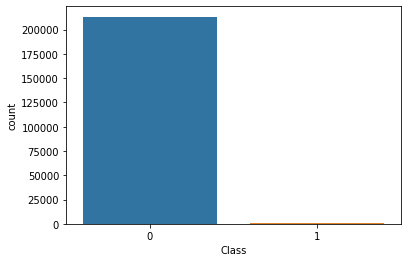

In [ ]:
#gerando o grafico para observar a desproporção do dataset
import seaborn as sns
ax = sns.countplot(y_treino, data=df)

In [ ]:
#Realizando o novo treino que faz o balanceamento das classes majoritarias
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
x_treino, y_treino = rus.fit_sample(x_treino,y_treino)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


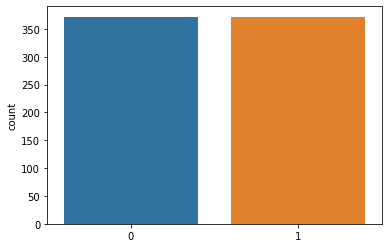

In [ ]:
#gerando o grafico para observar o novo balanceamento do dataset
import seaborn as sns
ax = sns.countplot(y_treino , data=df)

In [ ]:
#realizando a predição com modelo k-NN
nome1 = "KNN"
modelo = KNeighborsClassifier(n_neighbors=9)
modelo.fit(x_treino, y_treino)
y_predicted = modelo.predict(x_teste)
acuraciaKNN = (accuracy_score(y_teste, y_predicted))
f1KNN = f1_score(y_teste, y_predicted, average='weighted')
print(confusion_matrix(y_teste, y_predicted))
print("Acurácia:", acuraciaKNN) #realizar uma predição/ Procurar os notebooks que realização predições
print("F1 Score:", f1KNN)

In [ ]:
#realizando a predição com modelo SVM
nome2 = "SVM"
modelo = SVC(kernel='linear')
modelo.fit(x_treino, y_treino)
y_predicted = modelo.predict(x_teste)
acuraciaSVC = (accuracy_score(y_teste, y_predicted))
f1SVM = f1_score(y_teste, y_predicted, average='weighted')
print(confusion_matrix(y_teste, y_predicted))
print("Acurácia:", acuraciaSVC)
print("F1 Score:", f1SVM)

In [ ]:
#realizando a predição com modelo RF
nome3 = "Floresta Aleatória"
modelo = RandomForestClassifier(n_estimators=100)
modelo.fit(x_treino, y_treino)
y_predicted = modelo.predict(x_teste)
acuraciaFR = accuracy_score(y_teste, y_predicted)
f1FR = f1_score(y_teste, y_predicted, average='weighted')
print(confusion_matrix(y_teste, y_predicted))
print("Acurácia:", acuraciaFR)
print("F1 Score:", f1FR)